# **CREACIÓN ARCHIVO PARA GENERAR LAS FUNCIONES DE PETICIÓN COMO LAS DE MACHINE LEARNING**

Se abriran los archivos según sus necesidades para generación de cada uno de las funciones 

In [1]:
import pandas as pd
import json
import re
import ast
import numpy as np

In [2]:
dfItems = pd.read_csv('dfItemsListo')

In [3]:
dfItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246355 entries, 0 to 3246354
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   user_url       object
 2   item_id        int64 
 3   item_name      object
 4   playtimeTotal  int64 
dtypes: int64(2), object(3)
memory usage: 123.8+ MB


In [4]:
dfGames = pd.read_csv('dfGamesListo')

In [5]:
dfItems.head()

,user_id,user_url,item_id,item_name,playtimeTotal
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,300,Day of Defeat: Source,4733
3,76561197970982479,http://steamcommunity.com/profiles/76561197970...,240,Counter-Strike: Source,1853
4,76561197970982479,http://steamcommunity.com/profiles/76561197970...,3830,Psychonauts,333


In [6]:
dfGames.head()

,genres,url,reviews_url,price,early_access,item_id,developer,Titulo,anios
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",http://store.steampowered.com/app/761140/Lost_...,http://steamcommunity.com/app/761140/reviews/?...,4.99,0,761140,Kotoshiro,Lost Summoner Kitty,2018
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",http://store.steampowered.com/app/643980/Ironb...,http://steamcommunity.com/app/643980/reviews/?...,0.00,0,643980,Secret Level SRL,Ironbound,2018
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",http://store.steampowered.com/app/670290/Real_...,http://steamcommunity.com/app/670290/reviews/?...,0.00,0,670290,Poolians.com,Real Pool 3D - Poolians,2017
3,"['Action', 'Adventure', 'Casual']",http://store.steampowered.com/app/767400/2222/,http://steamcommunity.com/app/767400/reviews/?...,0.99,0,767400,彼岸领域,弹炸人2222,2017
4,"['Action', 'Adventure', 'Simulation']",http://store.steampowered.com/app/772540/Battl...,http://steamcommunity.com/app/772540/reviews/?...,3.99,0,772540,Trickjump Games Ltd,Battle Royale Trainer,2018


Para tener un mejor manejo y llamado de las consultas eliminamos los [ ] en los datos de la columna genres.

In [7]:
dfGames['genres'] = dfGames['genres'].str.replace('[\[\]]', '', regex=True)

In [8]:
dfGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29781 entries, 0 to 29780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        29781 non-null  object 
 1   url           29781 non-null  object 
 2   reviews_url   29781 non-null  object 
 3   price         28780 non-null  float64
 4   early_access  29781 non-null  int64  
 5   item_id       29781 non-null  int64  
 6   developer     29781 non-null  object 
 7   Titulo        29781 non-null  object 
 8   anios         29781 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 2.0+ MB


In [9]:
dfReviews = pd.read_csv('dfReviewsListo')

In [10]:
dfReviews.head()

,user_id,user_url,funny,item_id,recommend,review,postedAnios
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0,1250,1,Simple yet with great replayability. In my opi...,2011
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0,22200,1,It's unique and worth a playthrough.,2011
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0,43110,1,Great atmosphere. The gunplay can be a bit chu...,2011
3,js41637,http://steamcommunity.com/id/js41637,0,251610,1,I know what you think when you see this title ...,2014
4,js41637,http://steamcommunity.com/id/js41637,0,227300,1,For a simple (it's actually not all that simpl...,2013


In [11]:
dfReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48498 entries, 0 to 48497
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      48498 non-null  object
 1   user_url     48498 non-null  object
 2   funny        48498 non-null  int64 
 3   item_id      48498 non-null  int64 
 4   recommend    48498 non-null  int64 
 5   review       48471 non-null  object
 6   postedAnios  48498 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.6+ MB


## PRUEBA Y CREACIÓN DE LAS FUNCIONES

### def developer( desarrollador : str ): Cantidad de items y porcentaje de contenido Free por año según empresa desarrolladora.

Generamos una copia para no afectar nuestros dataframe y se irá acondicionando los nuevos dataframe para usar los datos de la mejor manera

In [12]:
dfGames_copia = dfGames.copy()

Seleccionamos las columnas a trabajar en la función

In [13]:
columns = ['item_id','developer','price','anios']
dfGames_copia = dfGames_copia[columns]

Se preguntaran por qué no se elimino los NaN en el tratamiento del archivo data?, y es muy sencillo esta columna si le quitaba antes los NaN me iba afectar en perdida de información, en la cual ella no participa, entonces es preferible hacer el borrado de estos cuando necesitemos trabajar con esta columna price. 

In [14]:
dfGames_copia = dfGames_copia.dropna(subset='price')

In [15]:
dfGames_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28780 entries, 0 to 29780
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    28780 non-null  int64  
 1   developer  28780 non-null  object 
 2   price      28780 non-null  float64
 3   anios      28780 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ MB


In [16]:
dfGames_copia = dfGames_copia.reset_index(drop=True)

### F1 RENDER

In [17]:
dfGames_copia.head()

,item_id,developer,price,anios
0,761140,Kotoshiro,4.99,2018
1,643980,Secret Level SRL,0.00,2018
2,670290,Poolians.com,0.00,2017
3,767400,彼岸领域,0.99,2017
4,772540,Trickjump Games Ltd,3.99,2018


### Se genera un nuevo archivo csv para esta función con las columnas y los datos que necesitamos para consultar.

In [18]:
dfGames_copia.to_csv('dfdeveloper.csv', index=False)

Esta función tiene ingreso de la consulta con la columna developer del cual se ha hecho que sea insensible a mayusculas y minusculas, filtramos por developer, según el conteo unico de los item_id, y relacionamos con la columna años y price para hacer la condición de un valor gratis en este caso cero(0), al final de obtener los filtros generamos el porcentaje de los juegos gratis segun la cantidad total por año y la cantidad total de juegos gratis, se hace la operación y se multriplica por 100, dejando todo explicado y estipulado en la respuesta y llamado de la función. 

In [ ]:
def developer(desarrollador):
    # Convertir el nombre del desarrollador a minúsculas
    desarrollador = desarrollador.lower()

    # Filtrar el DataFrame para obtener solo las filas de la empresa desarrolladora
    df_desarrollador = dfGames_copia[dfGames_copia['developer'].str.lower() == desarrollador]

    # Agrupar por año y contar la cantidad de juegos en cada grupo
    resumen_por_anio = df_desarrollador.groupby('anios').agg({'item_id': 'count'}).reset_index()
    resumen_por_anio = resumen_por_anio.rename(columns={'item_id': 'Cantidad de Items'})

    # Contar el número de juegos gratuitos por año
    juegos_gratis_por_anio = df_desarrollador[df_desarrollador['price'] == 0.0].groupby('anios').agg({'item_id': 'count'}).reset_index()
    
    # Combinar las dos tablas por el año
    resumen_por_anio = resumen_por_anio.merge(juegos_gratis_por_anio, on='anios', how='left')
    
    # Comprobar si la columna "Juegos Gratuitos" existe
    if 'Juegos Gratuitos' in resumen_por_anio:
        # Calcular el porcentaje de contenido gratuito y formatearlo
        resumen_por_anio['Contenido Free'] = (resumen_por_anio['Juegos Gratuitos'] / resumen_por_anio['Cantidad de Items'] * 100).fillna(0)
        resumen_por_anio['Contenido Free'] = resumen_por_anio['Contenido Free'].apply(lambda x: f"{x:.2f}%")
        # Eliminar la columna "Juegos Gratuitos" si existe
        resumen_por_anio = resumen_por_anio.drop(columns=['Juegos Gratuitos'])
    else:
        # Si no existe la columna, establecer Contenido Free en 0.00% para todos los años
        resumen_por_anio['Contenido Free'] = "0.00%"

    return resumen_por_anio


In [19]:
def developer(desarrollador):
    # Convertir el nombre del desarrollador a minúsculas
    desarrollador = desarrollador.lower()

    # Filtrar el DataFrame para obtener solo las filas de la empresa desarrolladora
    df_desarrollador = dfGames_copia[dfGames_copia['developer'].str.lower() == desarrollador]

    # Agrupar por año y contar la cantidad de juegos en cada grupo
    resumen_por_anio = df_desarrollador.groupby('anios').agg({'item_id': 'count'}).reset_index()
    resumen_por_anio = resumen_por_anio.rename(columns={'item_id': 'Cantidad de Items'})

    # Contar el número de juegos gratuitos por año
    juegos_gratis_por_anio = df_desarrollador[df_desarrollador['price'] == 0.0].groupby('anios').agg({'item_id': 'count'}).reset_index()
    
    # Combinar las dos tablas por el año
    resumen_por_anio = resumen_por_anio.merge(juegos_gratis_por_anio, on='anios', how='left')
    
    # Comprobar si la columna "Juegos Gratuitos" existe
    if 'item_id' in resumen_por_anio:
        # Calcular el porcentaje de contenido gratuito y formatearlo
        resumen_por_anio['Contenido Free'] = (resumen_por_anio['item_id'] / resumen_por_anio['Cantidad de Items'] * 100).fillna(0)
        resumen_por_anio['Contenido Free'] = resumen_por_anio['Contenido Free'].apply(lambda x: f"{x:.2f}%")
        # Eliminar la columna "Juegos Gratuitos" si existe
        resumen_por_anio = resumen_por_anio.drop(columns=['item_id'])
    else:
        # Si no existe la columna, establecer Contenido Free en 0.00% para todos los años
        resumen_por_anio['Contenido Free'] = "0.00%"

    return resumen_por_anio


In [20]:
developer('彼岸领域')

,anios,Cantidad de Items,Contenido Free
0,2017,1,0.00%


### def userdata( User_id : str ): Debe devolver cantidad de dinero gastado por el usuario, el porcentaje de recomendación en base a reviews.recommend y cantidad de items.
Ejemplo de retorno: {"Usuario X" : us213ndjss09sdf, "Dinero gastado": 200 USD, "% de recomendación": 20%, "cantidad de items": 5}

In [21]:
dfGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29781 entries, 0 to 29780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        29781 non-null  object 
 1   url           29781 non-null  object 
 2   reviews_url   29781 non-null  object 
 3   price         28780 non-null  float64
 4   early_access  29781 non-null  int64  
 5   item_id       29781 non-null  int64  
 6   developer     29781 non-null  object 
 7   Titulo        29781 non-null  object 
 8   anios         29781 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 2.0+ MB


In [22]:
dfReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48498 entries, 0 to 48497
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      48498 non-null  object
 1   user_url     48498 non-null  object
 2   funny        48498 non-null  int64 
 3   item_id      48498 non-null  int64 
 4   recommend    48498 non-null  int64 
 5   review       48471 non-null  object
 6   postedAnios  48498 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.6+ MB


Generamos copia para las nueva función a generar con los archivos de Games y Reviews 

In [23]:
dfGames_copiauserdata = dfGames.copy()

In [24]:
dfReviews_copiauserdata = dfReviews.copy()

Esta parte es tomar los unicos item_id para hacer una relación entre los dataframe nuevos, porque el archivo de Games es el unico que tiene todos los item_id en comparativa con Reviews es muy pequeño los item_id, entonces así solo nos centramos en trabajar los máximos item_id que podrían manejar los dos y hacer buenas relaciones en el momento d egenerar las consultas.

In [25]:
filtroReviews = dfReviews_copiauserdata['item_id'].unique()

In [26]:
filtroGames = dfGames_copiauserdata['item_id'].unique()

Se genera el nuevo dataframe con los item_id unicos relevantes que tienen en común para el archivo Games

In [27]:
dfFilGames = dfGames_copiauserdata[dfGames_copiauserdata['item_id'].isin(filtroReviews)]

In [28]:
dfFilGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2458 entries, 22 to 29765
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        2458 non-null   object 
 1   url           2458 non-null   object 
 2   reviews_url   2458 non-null   object 
 3   price         2383 non-null   float64
 4   early_access  2458 non-null   int64  
 5   item_id       2458 non-null   int64  
 6   developer     2458 non-null   object 
 7   Titulo        2458 non-null   object 
 8   anios         2458 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 192.0+ KB


Se genera el nuevo dataframe con los item_id unicos relevantes que tienen en común para el archivo Reviews

In [29]:
dfFilReviews = dfReviews_copiauserdata[dfReviews_copiauserdata['item_id'].isin(filtroGames)]

In [30]:
dfFilReviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41045 entries, 0 to 48496
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      41045 non-null  object
 1   user_url     41045 non-null  object
 2   funny        41045 non-null  int64 
 3   item_id      41045 non-null  int64 
 4   recommend    41045 non-null  int64 
 5   review       41024 non-null  object
 6   postedAnios  41045 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.5+ MB


Estos dataframe dfFilGamesbest, dfFilReviewsbest los generamos de una vez para una consulta de otra función que se realizara más adelante.

In [31]:
dfFilGamesbest = dfFilGames

In [32]:
dfFilReviewsbest = dfFilReviews

Ahora volvemos y quitamos los NaN para la columna price, se debe tener encuenta que son diferenets tratamientos de columnas y datfarame porque se trata de aprovehar el máximo de los datos. Adicional de hace el reset del index de ambos dataframe.

In [33]:
dfFilGames = dfFilGames.dropna(subset='price')

In [34]:
dfFilGames = dfFilGames.reset_index(drop=True)

In [35]:
dfFilReviews = dfFilReviews.reset_index(drop=True)

In [36]:
dfFilReviews.info()
dfFilGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41045 entries, 0 to 41044
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      41045 non-null  object
 1   user_url     41045 non-null  object
 2   funny        41045 non-null  int64 
 3   item_id      41045 non-null  int64 
 4   recommend    41045 non-null  int64 
 5   review       41024 non-null  object
 6   postedAnios  41045 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        2383 non-null   object 
 1   url           2383 non-null   object 
 2   reviews_url   2383 non-null   object 
 3   price         2383 non-null   float64
 4   early_access  2383 non-null   int64  
 5   item_id       2383 non-null   int64  
 6   developer     2383

In [37]:
dfFilGames.head()

,genres,url,reviews_url,price,early_access,item_id,developer,Titulo,anios
0,'Action',http://store.steampowered.com/app/70/HalfLife/,http://steamcommunity.com/app/70/reviews/?brow...,9.99,0,70,Valve,Half-Life,1998
1,"'Action', 'Indie', 'RPG'",http://store.steampowered.com/app/2400/The_Shi...,http://steamcommunity.com/app/2400/reviews/?br...,9.99,0,2400,Outerlight Ltd.,The Ship: Murder Party,2006
2,'Action',http://store.steampowered.com/app/3800/Advent_...,http://steamcommunity.com/app/3800/reviews/?br...,9.99,0,3800,GlyphX Games,Advent Rising,2005
3,"'Indie', 'Strategy'",http://store.steampowered.com/app/1520/DEFCON/,http://steamcommunity.com/app/1520/reviews/?br...,9.99,0,1520,Introversion Software,DEFCON,2006
4,"'Action', 'Indie', 'RPG'",http://store.steampowered.com/app/2420/The_Shi...,http://steamcommunity.com/app/2420/reviews/?br...,9.99,0,2420,Outerlight Ltd.,The Ship: Single Player,2006


### F2 RENDER

In [38]:
dfFilReviews.head()

,user_id,user_url,funny,item_id,recommend,review,postedAnios
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0,1250,1,Simple yet with great replayability. In my opi...,2011
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0,22200,1,It's unique and worth a playthrough.,2011
2,js41637,http://steamcommunity.com/id/js41637,0,227300,1,For a simple (it's actually not all that simpl...,2013
3,js41637,http://steamcommunity.com/id/js41637,0,239030,1,Very fun little game to play when your bored o...,2013
4,evcentric,http://steamcommunity.com/id/evcentric,0,370360,1,"""Run for fun? What the hell kind of fun is that?""",2015


Seleccionamos las columnas que nos interesan, también verán que hay funciones que nos sirven más adelante con algunos dataframe creados por eso existirán columnas que tal vez en algunas consultas no tendrán ninguna relevancia pero más adelante se observaran haciendo el llamado.

In [39]:
columns = ['user_id','user_url','item_id','funny','recommend','postedAnios']
dfFilReviews = dfFilReviews[columns]

In [40]:
columns = ['item_id','developer','price']
dfFilGames = dfFilGames[columns]

### Generamos dos dataframe especialmente para esta función

In [41]:
dfFilReviews.to_csv('dfuserdataR.csv', index=False)
dfFilGames.to_csv('dfuserdataG.csv', index=False)

In [ ]:
def userdata(User_id):
    # Filtrar las reseñas del usuario en dfFilReviews
    user_reviews = dfFilReviews[dfFilReviews['user_id'] == User_id]

    # Calcular la cantidad de dinero gastado por el usuario en dfFilGames
    money_spent = user_reviews.merge(dfFilGames, on='item_id', how='inner')['price'].sum()

    # Calcular el porcentaje de recomendación
    total_reviews = user_reviews.shape[0]
    positive_reviews = user_reviews['recommend'].sum()
    percentage_recommendation = (positive_reviews / total_reviews) * 100 if total_reviews > 0 else 0

    # Calcular la cantidad de ítems
    items_count = user_reviews['item_id'].nunique()

    # Crear el diccionario con los resultados
    user_data = {
        "Usuario X": User_id,
        "Dinero gastado": f"${money_spent:.2f} USD",
        "% de recomendación": f"{percentage_recommendation:.2f}%",
        "Cantidad de items": items_count
    }

    return user_data

En esta función ingresamos los usuarios y filtramos por price con un merged y en relación con el otro dataframe en la columna item_id, para hacer la suma del total, despues usamos la columna recommend para obtener el porcentaje de recomendación del usuario y se saca del total recomendado segun el usuario, al final creamos para el retorno un diccionario con las especificaciones deseadas de la consulta.

In [42]:
def userdata(User_id):
    # Filtrar las reseñas del usuario en dfFilReviews
    user_reviews = dfFilReviews[dfFilReviews['user_id'] == User_id]

    # Obtener la URL del usuario si existe
    user_url = dfFilReviews[dfFilReviews['user_id'] == User_id]['user_url'].iloc[0] if User_id in dfFilReviews['user_id'].values else None

    # Calcular la cantidad de dinero gastado por el usuario en dfFilGames
    money_spent = user_reviews.merge(dfFilGames, on='item_id', how='inner')['price'].sum()

    # Calcular el porcentaje de recomendación
    total_reviews = user_reviews.shape[0]
    positive_reviews = user_reviews['recommend'].sum()
    percentage_recommendation = (positive_reviews / total_reviews) * 100 if total_reviews > 0 else 0

    # Calcular la cantidad de ítems
    items_count = user_reviews['item_id'].nunique()

    # Crear el diccionario con los resultados
    user_data = {
        "Usuario X": User_id,
        "URL del Usuario": user_url,
        "Dinero gastado": f"${money_spent:.2f} USD",
        "% de recomendación": f"{percentage_recommendation:.2f}%",
        "Cantidad de items": items_count
    }
    
    return user_data

In [43]:
userdata('evcentric')

{'Usuario X': 'evcentric',
 'URL del Usuario': 'http://steamcommunity.com/id/evcentric',
 'Dinero gastado': '$58.95 USD',
 '% de recomendación': '100.00%',
 'Cantidad de items': 5}

### def UserForGenre( genero : str ): Debe devolver el usuario que acumula más horas jugadas para el género dado y una lista de la acumulación de horas jugadas por año.
Ejemplo de retorno: {"Usuario con más horas jugadas para Género X" : us213ndjss09sdf, "Horas jugadas":[{Año: 2013, Horas: 203}, {Año: 2012, Horas: 100}, {Año: 2011, Horas: 23}]}

Generamos copias de los dataframe Games e Items para la nueva función

In [44]:
dfGames_copiauserforgenre = dfGames.copy()

In [45]:
dfItems_copiauserforgenre = dfItems.copy()

Filtramos para trabajar solo con los datos en común de los dataframe y es muy importante ya que el archivo de Items tiene más de tres millones de datos repetidos del usuario con diferentes juegos, entonces nos centramos en la relación que tienen los item_id similares y así aprovechar al máximo los datos. 

In [46]:
filtroItems = dfItems_copiauserforgenre['item_id'].unique()

In [47]:
filtroGames = dfGames_copiauserforgenre['item_id'].unique()

In [48]:
dfFilItemsufg = dfItems_copiauserforgenre[dfItems_copiauserforgenre['item_id'].isin(filtroGames)]

In [49]:
dfFilGamesufg = dfGames_copiauserforgenre[dfGames_copiauserforgenre['item_id'].isin(filtroItems)]

Los nuevos dataframe con las que se podrán hacer las cobsultas en común de items y games. 

In [50]:
dfFilGamesufg.info()
dfFilItemsufg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8163 entries, 21 to 29765
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        8163 non-null   object 
 1   url           8163 non-null   object 
 2   reviews_url   8163 non-null   object 
 3   price         8040 non-null   float64
 4   early_access  8163 non-null   int64  
 5   item_id       8163 non-null   int64  
 6   developer     8163 non-null   object 
 7   Titulo        8163 non-null   object 
 8   anios         8163 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 637.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2754006 entries, 0 to 3246353
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   user_url       object
 2   item_id        int64 
 3   item_name      object
 4   playtimeTotal  int64 
dtypes: int64(2), object(3)
memory usage: 126.1+ MB


Se realiza el reset index de los nuevos dataframe.

In [51]:
dfFilItemsufg = dfFilItemsufg.reset_index(drop=True)

In [52]:
dfFilGamesufg = dfFilGamesufg.reset_index(drop=True)

Selección de las columnas a trabajar, en este caso no trabajamos price entonces por eso no se eliminaron los NaN mostrando que vamos va tener más datos para consultar.

In [53]:
columns = ['item_id','user_id','playtimeTotal']
dfFilItemsufg = dfFilItemsufg[columns]

In [54]:
columns = ['item_id','genres','anios']
dfFilGamesufg = dfFilGamesufg[columns]

Una función externa para consultar la columnas de genres o generos pues es de datos unicos y multiples, entonces se hicieron varias pruebas para realizar la afectación en la función a consultar.

In [55]:
def varia(*generos):
    dfFilGamesufgGenero = dfFilGamesufg[dfFilGamesufg['genres'].apply(lambda x: all(genero.lower() in x.lower() for genero in generos))]
    item_ids = dfFilGamesufgGenero['item_id']
    return item_ids

In [ ]:
#dfFilItemsufgI = dfFilItemsufg.groupby('user_id').head(40)

In [56]:
dfFilItemsufg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754006 entries, 0 to 2754005
Data columns (total 3 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   item_id        int64 
 1   user_id        object
 2   playtimeTotal  int64 
dtypes: int64(2), object(1)
memory usage: 63.0+ MB


### Generación de los nuevos archivos csv que trabajaran especialmente para esta función

In [57]:
dfFilItemsufg.to_csv('dfuserforGenI.csv', index=False)
dfFilGamesufg.to_csv('dfuserforGenG.csv', index=False)

Vamos a realizar modificaciones al archivo dfserforGenI, porque al subir en el git hub no dejaba subir archivos mayores de 25Mb, entonces como para mostrar el deployment vamos a reducir el archivo pero solo para subirlo al Git pero en Fastapi si va estar comleto pues, ya se probo y funciono correctamente. Para ello vamos a sleccionar cierta cantidad de item_id para mostrar solo su funcionamiento

In [58]:
dfFilItemsufg.head()

,item_id,user_id,playtimeTotal
0,10,76561197970982479,6
1,30,76561197970982479,7
2,300,76561197970982479,4733
3,240,76561197970982479,1853
4,3830,76561197970982479,333


In [59]:
dfFilItemsufg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754006 entries, 0 to 2754005
Data columns (total 3 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   item_id        int64 
 1   user_id        object
 2   playtimeTotal  int64 
dtypes: int64(2), object(1)
memory usage: 63.0+ MB


Cambiamos el formato a parquet para subir el archivo a github y funciona, pero cuando se hace el deploy la carga de los archivos en funcionamiento dice que pasa de las 512MB de memoria, entonces procederemos a reducir nuestro archivo dataframe seleccionando los item_id por cantidad de registros en este momento nuestro archivo es de un rango de index 2'754.006

In [60]:
dfFilItemsufg.to_parquet('dfuserforGenIPark.csv', engine='pyarrow')

In [61]:
df_selected = dfFilItemsufg.groupby('item_id').head(500)
df_selected.reset_index(drop=True, inplace=True)

In [62]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893070 entries, 0 to 893069
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   item_id        893070 non-null  int64 
 1   user_id        893070 non-null  object
 2   playtimeTotal  893070 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 20.4+ MB


Por cierto y a tener encuenta el archivo nuevo 'dfuserforGenIReduci' solo servirá para la carga del deploy RangeIndex: 893070 entries, 0 to 893069, en la fastapi ya estan probados con los originales y la cantidad de index obtenido de la limpieza y reparación de los datos.

In [63]:
df_selected = dfFilItemsufg.groupby('item_id').head(300)
df_selected.reset_index(drop=True, inplace=True)

### F3 RENDER

In [64]:
dfFilGamesufg.head()

,item_id,genres,anios
0,282010,"'Action', 'Indie', 'Racing'",1997
1,70,'Action',1998
2,1640,'Strategy',2006
3,1630,'Strategy',2006
4,2400,"'Action', 'Indie', 'RPG'",2006


In [65]:
df_selected.head()

,item_id,user_id,playtimeTotal
0,10,76561197970982479,6
1,30,76561197970982479,7
2,300,76561197970982479,4733
3,240,76561197970982479,1853
4,3830,76561197970982479,333


In [66]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681020 entries, 0 to 681019
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   item_id        681020 non-null  int64 
 1   user_id        681020 non-null  object
 2   playtimeTotal  681020 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ MB


Se sigue presentando el problema del deploy, ahora tomamos del archivo requeriment y solo seleccionamos las librerias necesarias:
contourpy
fastapi==0.103.2, fsspec, gensim, h5py, ipykernel, ipython, jsonlines, jupyter_client, jupyter_core, keras, langdetect==1.0.9, nltk==3.8.1, numpy, pandas,pyproj, scikit-learn, scipy, textblob==0.17.1, uvicorn

Sigue generando el mismo problema, vamos a reducir el archivo a RangeIndex: 681020 entries, 0 to 681019

In [67]:
df_selected.to_csv('dfuserforGenIReduci.csv', index=False)

En esta consulta su ingreso es por género, es tipo string y puede ser único género o múltiple, adicional se hace insensible a mayusculas y minusculas, ahora cono los unicos item_id del filtro de generos vamos al dataframe de items y relacionamos usuario y las horas totales tomando como prioridad el máximo usuario de todos, de hay se vuelve nuevamente y de ese filtro tomamos nuevamente los item_id para ir otra vez al dataframe de games y poder obtener los años y hacemos el retorno de la función para indicar la respuesta adecuada   

In [69]:
def UserForGenre(*generos):
    condition = dfFilGamesufg['genres'].apply(lambda x: any(genero.lower() in x.lower() for genero in generos))
    item_ids = dfFilGamesufg[condition]['item_id']

    if item_ids.empty:
        return {"No se encontraron datos para los géneros especificados"}

    # Filtrar las filas de dfFilItemsufg con los item_id obtenidos
    dfFilItemsufgGenero = dfFilItemsufg[dfFilItemsufg['item_id'].isin(item_ids)]
    #print(dfFilItemsufgGenero)
    
    # Encontrar el usuario con más horas jugadas para el género dado
    user_max_playtime = dfFilItemsufgGenero.groupby('user_id')['playtimeTotal'].sum().idxmax()
    
    # Filtrar las filas de dfFilItemsufg con el usuario que tiene más horas jugadas
    dfUserMaxPlaytime = dfFilItemsufg[dfFilItemsufg['user_id'] == user_max_playtime]
    
    # Obtener los item_id correspondientes a dfUserMaxPlaytime
    item_ids_usuario = dfUserMaxPlaytime['item_id'].unique()
    
    # Filtrar dfFilGamesufg por los item_id del usuario con más horas jugadas
    dfJuegosUsuario = dfFilGamesufg[dfFilGamesufg['item_id'].isin(item_ids_usuario)]
    
    # Obtener los años para los juegos del usuario
    anios_usuario = dfJuegosUsuario.groupby('anios')['item_id'].count().reset_index()
    
    # Crear una lista de años con sus horas jugadas
    horas_por_anio = [{"Año": int(row['anios']), "Horas": dfFilItemsufgGenero[dfFilItemsufgGenero['item_id'].isin(dfJuegosUsuario[dfJuegosUsuario['anios'] == row['anios']]['item_id'])]['playtimeTotal'].sum()} for _, row in anios_usuario.iterrows()]
    
    return {"Usuario con más horas jugadas para Género " + ', '.join(generos): user_max_playtime, "Horas jugadas por Año": horas_por_anio}


In [70]:
dfFilGamesufg.head()

,item_id,genres,anios
0,282010,"'Action', 'Indie', 'Racing'",1997
1,70,'Action',1998
2,1640,'Strategy',2006
3,1630,'Strategy',2006
4,2400,"'Action', 'Indie', 'RPG'",2006


In [71]:
UserForGenre('IndiE')

{'Usuario con más horas jugadas para Género IndiE': 'thugnificent',
 'Horas jugadas por Año': [{'Año': 1988, 'Horas': 0},
  {'Año': 1993, 'Horas': 0},
  {'Año': 1994, 'Horas': 0},
  {'Año': 1995, 'Horas': 0},
  {'Año': 1996, 'Horas': 0},
  {'Año': 1997, 'Horas': 54305},
  {'Año': 1998, 'Horas': 14593},
  {'Año': 1999, 'Horas': 0},
  {'Año': 2000, 'Horas': 2274},
  {'Año': 2001, 'Horas': 0},
  {'Año': 2002, 'Horas': 596},
  {'Año': 2003, 'Horas': 2112807},
  {'Año': 2004, 'Horas': 0},
  {'Año': 2005, 'Horas': 8559},
  {'Año': 2006, 'Horas': 444987823},
  {'Año': 2007, 'Horas': 983798},
  {'Año': 2008, 'Horas': 4601576},
  {'Año': 2009, 'Horas': 2463359},
  {'Año': 2010, 'Horas': 5368898},
  {'Año': 2011, 'Horas': 207743535},
  {'Año': 2012, 'Horas': 109456726},
  {'Año': 2013, 'Horas': 157670794},
  {'Año': 2014, 'Horas': 56800284},
  {'Año': 2015, 'Horas': 101217401},
  {'Año': 2016, 'Horas': 61568413},
  {'Año': 2017, 'Horas': 124587247},
  {'Año': 2018, 'Horas': 2203}]}

### def best_developer_year( año : int ): Devuelve el top 3 de desarrolladores con juegos MÁS recomendados por usuarios para el año dado. (reviews.recommend = True y comentarios positivos)
Ejemplo de retorno: [{"Puesto 1" : X}, {"Puesto 2" : Y},{"Puesto 3" : Z}]

Estos dataframe ya lo habiamos generado arriba porque sabiamos en el análisis que nos iban a servir pra otra función, reset del index

In [72]:
dfFilGamesbest.info()
dfFilReviewsbest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2458 entries, 22 to 29765
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        2458 non-null   object 
 1   url           2458 non-null   object 
 2   reviews_url   2458 non-null   object 
 3   price         2383 non-null   float64
 4   early_access  2458 non-null   int64  
 5   item_id       2458 non-null   int64  
 6   developer     2458 non-null   object 
 7   Titulo        2458 non-null   object 
 8   anios         2458 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 192.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 41045 entries, 0 to 48496
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      41045 non-null  object
 1   user_url     41045 non-null  object
 2   funny        41045 non-null  int64 
 3   item_id      41045 non-null  int64 
 4   recomm

In [73]:
dfFilGamesbest = dfFilGamesbest.reset_index(drop=True)
dfFilReviewsbest = dfFilReviewsbest.reset_index(drop=True)

Seleccionamos las columnas para la función a trabajar

In [74]:
columns = ['item_id','funny','recommend','review','postedAnios']
dfFilReviewsbest = dfFilReviewsbest[columns]

In [75]:
columns = ['item_id','developer','anios']
dfFilGamesbest = dfFilGamesbest[columns]

Generamos los nuevos archivos csv para la prueba de la función obtener

In [76]:
dfFilGamesbest.to_csv('dfbestGames.csv', index=False)
dfFilReviewsbest.to_csv('dbestReviews.csv', index=False)

Para esta función ingresamos por año pero es especial porque este año es la columna postedAnios que existe en el dataframe de Reviews porque es de recomendaciones, algo de notar es que filtra desde los años 2010 a 2015; seguido a esto condicionamos con lo mejor a uno(1) y agrupamos por item_id, generamos un nuevo dataframe lo reiniciamos y renombramos, hacemos un merged con la columna en común item_id para tomor los tres(3) primerso developer y dar el retorno de la función. 

In [77]:
def best_developer_year(año):
    # Filtrar las revisiones para el año dado
    reviews_año = dfFilReviewsbest[dfFilReviewsbest['postedAnios'] == año]
    
    # Contar cuántos usuarios han recomendado cada juego por desarrollador
    developer_recommended_count = reviews_año[(reviews_año['recommend'] == 1)].groupby('item_id')['recommend'].count()
    
    # Unir los datos con la información de los desarrolladores
    developer_recommended_count = developer_recommended_count.reset_index()
    developer_recommended_count = developer_recommended_count.rename(columns={'item_id': 'item_id', 'recommend': 'Recomendaciones'})
    developer_data = dfFilGamesbest[['item_id', 'developer']]
    developer_data = developer_data.merge(developer_recommended_count, on='item_id', how='inner')
    
    # Calcular el total de recomendaciones por desarrollador
    developer_total_recommended = developer_data.groupby('developer')['Recomendaciones'].sum()
    
    # Obtener el top 3 de desarrolladores con más recomendaciones
    top_developers = developer_total_recommended.nlargest(3).reset_index()
    
    # Formatear la salida como una lista de diccionarios
    result = [{"Puesto {}: {}".format(i + 1, row['developer']): row['Recomendaciones']} for i, row in top_developers.iterrows()]
    
    return result

In [78]:
best_developer_year(2015)

[{'Puesto 1: Valve': 2567},
 {'Puesto 2: Facepunch Studios': 519},
 {'Puesto 3: Smartly Dressed Games': 282}]

Aprovechamos estos dataframe y vamos a generar la función de análisis de sentimiento

In [79]:
dfFilReviewsbest.head()

,item_id,funny,recommend,review,postedAnios
0,1250,0,1,Simple yet with great replayability. In my opi...,2011
1,22200,0,1,It's unique and worth a playthrough.,2011
2,227300,0,1,For a simple (it's actually not all that simpl...,2013
3,239030,0,1,Very fun little game to play when your bored o...,2013
4,370360,0,1,"""Run for fun? What the hell kind of fun is that?""",2015


Ahora como si nos importa tener bien reparado los datos de la columna review entonces ahora si filtramos y eliminamos los NaN

In [80]:
# Contar los valores NaN en la columna "review"
nan_count = dfFilReviewsbest['review'].isna().sum()

# O alternativamente usando isnull():
# nan_count = dfFilReviewsbest['review'].isnull().sum()

print("Cantidad de NaN en la columna 'review':", nan_count)

Cantidad de NaN en la columna 'review': 21


In [81]:
nan_rows = dfFilReviewsbest[dfFilReviewsbest['review'].isna()]
nan_rows

,item_id,funny,recommend,review,postedAnios
3017,550,0,1,NaN,2014
14408,211820,0,1,NaN,2014
14974,620,0,1,NaN,2014
15388,239660,0,1,NaN,2013
16546,730,0,1,NaN,2015
16816,17330,0,1,NaN,2013
16817,107410,0,1,NaN,2013
18592,440,0,1,NaN,2013
20880,440,0,1,NaN,2015
21437,221640,0,1,NaN,2014


Esto lo implementamos porque identificamos algunas columnas vacias entonces podemos llenar algunas para no perder datos con la relación de la columna recommend y si encontramos el uno(1) asignamos positivo sino lo contrario.

In [82]:
# Llenar NaN en la columna "review" con "bueno" si "recommend" es igual a 1
dfFilReviewsbest.loc[(dfFilReviewsbest['recommend'] == 1) & (dfFilReviewsbest['review'].isna()), 'review'] = 'bueno'

# Llenar NaN en la columna "review" cn "malo" si "recommend" es igual a 0
dfFilReviewsbest.loc[(dfFilReviewsbest['recommend'] == 0) & (dfFilReviewsbest['review'].isna()), 'review'] = 'malo'

Busqueda de valores flotantes porque en la generación de la función nos puede genear errores

In [83]:
# Filtrar las filas con valores flotantes en la columna 'review'
float_reviews = dfFilReviewsbest[dfFilReviewsbest['review'].apply(lambda x: isinstance(x, float))]

# Mostrar las filas con valores flotantes
print(float_reviews)

Empty DataFrame
Columns: [item_id, funny, recommend, review, postedAnios]
Index: []


### F5 RENDER

In [84]:
dfFilGames.head()

,item_id,developer,price
0,70,Valve,9.99
1,2400,Outerlight Ltd.,9.99
2,3800,GlyphX Games,9.99
3,1520,Introversion Software,9.99
4,2420,Outerlight Ltd.,9.99


Utilizamos la biblioteca para hacer modificaciones en el texto de toda la columna review y así tener una mejor lectura de datos 

In [85]:
from unidecode import unidecode

Limpieza de la columna review para hacer más fácil la lectura d elos datos y generar datos de la función sentimiento con mejores resultados

In [86]:
import pandas as pd
import string

# Función para limpiar el texto
def clean_text(text):
    # Eliminar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = ''.join([char for char in text if not char.isdigit()])
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar espacios en blanco adicionales
    text = ' '.join(text.split())
    return text

# Aplicar la limpieza a la columna 'review' y crear una nueva columna 'reviewLimpia'
dfFilReviewsbest['reviewLimpia'] = dfFilReviewsbest['review'].apply(clean_text)

# Reemplazar las admiraciones hacia abajo en 'reviewLimpia' con !
#dfFilReviewsbest['reviewLimpia'] = dfFilReviewsbest['reviewLimpia'].str.replace("¡", "!")

# Ver el resultado
print(dfFilReviewsbest['reviewLimpia'])

0        simple yet with great replayability in my opin...
1                       its unique and worth a playthrough
2        for a simple its actually not all that simple ...
3        very fun little game to play when your bored o...
4            run for fun what the hell kind of fun is that
                               ...                        
41040                                                 neat
41041                                       its funnnnnnnn
41042    awesome fantasy game if you dont mind the grap...
41043                                     prettyy mad game
41044                                         amazing game
Name: reviewLimpia, Length: 41045, dtype: object


In [87]:
dfFilReviewsbest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41045 entries, 0 to 41044
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   item_id       41045 non-null  int64 
 1   funny         41045 non-null  int64 
 2   recommend     41045 non-null  int64 
 3   review        41045 non-null  object
 4   postedAnios   41045 non-null  int64 
 5   reviewLimpia  41045 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.9+ MB


In [88]:
dfFilReviewsbest['review'].head(20)

0     Simple yet with great replayability. In my opi...
1                  It's unique and worth a playthrough.
2     For a simple (it's actually not all that simpl...
3     Very fun little game to play when your bored o...
4     "Run for fun? What the hell kind of fun is that?"
5     Elegant integration of gameplay, story, world ...
6     Random drops and random quests, with stat poin...
7     Fun balance of tactics and strategy.  Potentia...
8     Fun world builder, with plenty of option of ho...
9     This game... is so fun. The fight sequences ha...
10    Really Really Really Great Game, very good sto...
11    Just buy it already. Great Story, Great Multip...
12    It was a great game from what I played, right ...
13    The ending to this game is.... ♥♥♥♥♥♥♥.... Jus...
14    Alan wake is a really good game, the light eff...
15                                              Git gud
16    It's like Terraria, you play for 9 hours strai...
17                Hold shift to win, Hold CTRL t

### Generamos los archivos csv indicados para hacer al función a trabajar

In [89]:
dfFilReviewsbest.head()

,item_id,funny,recommend,review,postedAnios,reviewLimpia
0,1250,0,1,Simple yet with great replayability. In my opi...,2011,simple yet with great replayability in my opin...
1,22200,0,1,It's unique and worth a playthrough.,2011,its unique and worth a playthrough
2,227300,0,1,For a simple (it's actually not all that simpl...,2013,for a simple its actually not all that simple ...
3,239030,0,1,Very fun little game to play when your bored o...,2013,very fun little game to play when your bored o...
4,370360,0,1,"""Run for fun? What the hell kind of fun is that?""",2015,run for fun what the hell kind of fun is that


In [90]:
dfFilGamesbest.to_csv('dfAnalisiGames.csv', index=False)
dfFilReviewsbest.to_csv('dfAnalisisReviews.csv', index=False)

Primero usamos la biblioteca de lenguaje natural (NLP), y seguida de ella la biblioteca de analisis de sentimiento NLTK, VADER. Generamos ingreso a la función por developer, filtramos por el item_id obtenido del developer y vamos a filtrar las reseñas que estan en el dataframe de Reviews el cual se relacionan por item_id, generamos los analisis de sentimiento a esta relación en la columna review y las bibliotecas mencionadas anteriormente, condicionamos el análisis para seleccionar los filtros como positivo y negativo ayudandonos d ela columna recommend, obtenemos sus dimensiones y retornamos la respuesta como lo indica la función  

In [91]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def developer_analisis_sentimiento(developer):
    # Cargar los DataFrames
    df_reviews = dfFilReviewsbest
    df_games = dfFilGamesbest

    # Filtrar reseñas del desarrollador especificado
    item_ids_developer = df_games[df_games['developer'] == developer]['item_id']
    df_reviews_developer = df_reviews[df_reviews['item_id'].isin(item_ids_developer)]

    # Realizar el análisis de sentimiento en las reseñas
    vader_analyzer = SentimentIntensityAnalyzer()
    df_reviews_developer['vader_sentiment'] = df_reviews_developer['review'].apply(lambda x: vader_analyzer.polarity_scores(x))
    df_reviews_developer['textblob_sentiment'] = df_reviews_developer['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

    # Clasificar comentarios neutros según la columna 'recommend'
    df_reviews_developer['sentiment'] = 'neutral'
    df_reviews_developer.loc[df_reviews_developer['recommend'] == 1, 'sentiment'] = 'positive'
    df_reviews_developer.loc[df_reviews_developer['recommend'] == 0, 'sentiment'] = 'negative'

    # Contar reseñas positivas y negativas
    positive_reviews = df_reviews_developer[df_reviews_developer['sentiment'] == 'positive'].shape[0]
    negative_reviews = df_reviews_developer[df_reviews_developer['sentiment'] == 'negative'].shape[0]

    resultados = {developer: {'Positive': positive_reviews, 'Negative': negative_reviews}}
    return resultados



In [93]:
developer_analisis_sentimiento('New World Interactive')

C:\Users\JAAJ\AppData\Local\Temp\ipykernel_6440\1673827336.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_developer['vader_sentiment'] = df_reviews_developer['review'].apply(lambda x: vader_analyzer.polarity_scores(x))
C:\Users\JAAJ\AppData\Local\Temp\ipykernel_6440\1673827336.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_developer['textblob_sentiment'] = df_reviews_developer['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
C:\Users\JAAJ\AppData\Local\Temp\ip

{'New World Interactive': {'Positive': 167, 'Negative': 13}}

## Funciones de Machine Learning

In [94]:
dfGames.head()

,genres,url,reviews_url,price,early_access,item_id,developer,Titulo,anios
0,"'Action', 'Casual', 'Indie', 'Simulation', 'St...",http://store.steampowered.com/app/761140/Lost_...,http://steamcommunity.com/app/761140/reviews/?...,4.99,0,761140,Kotoshiro,Lost Summoner Kitty,2018
1,"'Free to Play', 'Indie', 'RPG', 'Strategy'",http://store.steampowered.com/app/643980/Ironb...,http://steamcommunity.com/app/643980/reviews/?...,0.00,0,643980,Secret Level SRL,Ironbound,2018
2,"'Casual', 'Free to Play', 'Indie', 'Simulation...",http://store.steampowered.com/app/670290/Real_...,http://steamcommunity.com/app/670290/reviews/?...,0.00,0,670290,Poolians.com,Real Pool 3D - Poolians,2017
3,"'Action', 'Adventure', 'Casual'",http://store.steampowered.com/app/767400/2222/,http://steamcommunity.com/app/767400/reviews/?...,0.99,0,767400,彼岸领域,弹炸人2222,2017
4,"'Action', 'Adventure', 'Simulation'",http://store.steampowered.com/app/772540/Battl...,http://steamcommunity.com/app/772540/reviews/?...,3.99,0,772540,Trickjump Games Ltd,Battle Royale Trainer,2018


In [95]:
dfGames.info()
dfItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29781 entries, 0 to 29780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        29781 non-null  object 
 1   url           29781 non-null  object 
 2   reviews_url   29781 non-null  object 
 3   price         28780 non-null  float64
 4   early_access  29781 non-null  int64  
 5   item_id       29781 non-null  int64  
 6   developer     29781 non-null  object 
 7   Titulo        29781 non-null  object 
 8   anios         29781 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246355 entries, 0 to 3246354
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   user_url       object
 2   item_id        int64 
 3   item_name      object
 4   playtimeTotal  int64 
dtypes: int64(2), object(3)
memory usage: 123.8+ MB


In [96]:
dfGames.head()

,genres,url,reviews_url,price,early_access,item_id,developer,Titulo,anios
0,"'Action', 'Casual', 'Indie', 'Simulation', 'St...",http://store.steampowered.com/app/761140/Lost_...,http://steamcommunity.com/app/761140/reviews/?...,4.99,0,761140,Kotoshiro,Lost Summoner Kitty,2018
1,"'Free to Play', 'Indie', 'RPG', 'Strategy'",http://store.steampowered.com/app/643980/Ironb...,http://steamcommunity.com/app/643980/reviews/?...,0.00,0,643980,Secret Level SRL,Ironbound,2018
2,"'Casual', 'Free to Play', 'Indie', 'Simulation...",http://store.steampowered.com/app/670290/Real_...,http://steamcommunity.com/app/670290/reviews/?...,0.00,0,670290,Poolians.com,Real Pool 3D - Poolians,2017
3,"'Action', 'Adventure', 'Casual'",http://store.steampowered.com/app/767400/2222/,http://steamcommunity.com/app/767400/reviews/?...,0.99,0,767400,彼岸领域,弹炸人2222,2017
4,"'Action', 'Adventure', 'Simulation'",http://store.steampowered.com/app/772540/Battl...,http://steamcommunity.com/app/772540/reviews/?...,3.99,0,772540,Trickjump Games Ltd,Battle Royale Trainer,2018


Generamos las copias indicadas para generar los dataframes indicados para la fucnión de machine learning

In [97]:
dfGamesMachine = dfGames.copy()
dfItemsMachine = dfItems.copy()
dfReviewsMachine = dfReviews.copy()

In [98]:
dfGamesMachine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29781 entries, 0 to 29780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        29781 non-null  object 
 1   url           29781 non-null  object 
 2   reviews_url   29781 non-null  object 
 3   price         28780 non-null  float64
 4   early_access  29781 non-null  int64  
 5   item_id       29781 non-null  int64  
 6   developer     29781 non-null  object 
 7   Titulo        29781 non-null  object 
 8   anios         29781 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 2.0+ MB


Eliminamos duplicados en el dataframe, eliminamos la columna review.

In [99]:
dfGamesMachine = dfGamesMachine.drop_duplicates()
dfItemsMachine = dfItemsMachine.drop_duplicates()
dfReviewsMachine = dfReviewsMachine.drop_duplicates()

In [100]:
dfReviewsMachine = dfReviewsMachine.drop(columns=['review'])

In [101]:
dfReviewsMachine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48498 entries, 0 to 48497
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      48498 non-null  object
 1   user_url     48498 non-null  object
 2   funny        48498 non-null  int64 
 3   item_id      48498 non-null  int64 
 4   recommend    48498 non-null  int64 
 5   postedAnios  48498 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.2+ MB


In [102]:
dfGamesMachine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29781 entries, 0 to 29780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        29781 non-null  object 
 1   url           29781 non-null  object 
 2   reviews_url   29781 non-null  object 
 3   price         28780 non-null  float64
 4   early_access  29781 non-null  int64  
 5   item_id       29781 non-null  int64  
 6   developer     29781 non-null  object 
 7   Titulo        29781 non-null  object 
 8   anios         29781 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 2.0+ MB


Eliminamos los NaN de la columna price y que impacte en las demás columnas del dataframe Games y usamos el index reset.

In [103]:
dfGamesMachine = dfGamesMachine.dropna(subset=['price'])

In [104]:
dfGamesMachine = dfGamesMachine.reset_index(drop=True)

Seleccionamos las columnas adecuadas para Items

In [105]:
columns = ['item_id','user_id','playtimeTotal']
dfItemsMachine = dfItemsMachine[columns]

In [106]:
dfItemsMachine = dfItemsMachine.reset_index(drop=True)

In [107]:
dfItemsMachine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245283 entries, 0 to 3245282
Data columns (total 3 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   item_id        int64 
 1   user_id        object
 2   playtimeTotal  int64 
dtypes: int64(2), object(1)
memory usage: 74.3+ MB


Generamos un merged entre Games y Reviews con la columna item_id en común y es intersección.

In [108]:
columns = ['item_id']
merged_RevGameS = dfGamesMachine.merge(dfReviewsMachine, on=columns, how='inner')

In [109]:
merged_RevGameS.head()

,genres,url,reviews_url,price,early_access,item_id,developer,Titulo,anios,user_id,user_url,funny,recommend,postedAnios
0,'Action',http://store.steampowered.com/app/70/HalfLife/,http://steamcommunity.com/app/70/reviews/?brow...,9.99,0,70,Valve,Half-Life,1998,exiaez,http://steamcommunity.com/id/exiaez,5,1,2015
1,'Action',http://store.steampowered.com/app/70/HalfLife/,http://steamcommunity.com/app/70/reviews/?brow...,9.99,0,70,Valve,Half-Life,1998,mrpfresh,http://steamcommunity.com/id/mrpfresh,0,1,2011
2,'Action',http://store.steampowered.com/app/70/HalfLife/,http://steamcommunity.com/app/70/reviews/?brow...,9.99,0,70,Valve,Half-Life,1998,armouredmarshmallow,http://steamcommunity.com/id/armouredmarshmallow,0,1,2014
3,'Action',http://store.steampowered.com/app/70/HalfLife/,http://steamcommunity.com/app/70/reviews/?brow...,9.99,0,70,Valve,Half-Life,1998,Bluegills,http://steamcommunity.com/id/Bluegills,0,1,2013
4,'Action',http://store.steampowered.com/app/70/HalfLife/,http://steamcommunity.com/app/70/reviews/?brow...,9.99,0,70,Valve,Half-Life,1998,76561198071955492,http://steamcommunity.com/profiles/76561198071...,0,1,2013


Seleccionamos las columnas deseadas que nos quedo del merged

In [110]:
columns = ['item_id','user_id','Titulo','genres','developer','price','recommend','anios']
merged_RevGameS = merged_RevGameS[columns]

Pruebas sin tener encuenta

In [111]:
#filtroItemsMachine = dfItemsMachine['item_id','user_id'].unique()

In [112]:
#dfItemsMachine = dfItemsMachine.groupby('user_id').head(40)

Generamos un nuevo merged con el dataframe Items y las columnas item_id y user_id para dejar un solo dataframe.

In [113]:
columns = ['item_id','user_id']
mergedMachine = merged_RevGameS.merge(dfItemsMachine, on=columns, how='inner')

reset del index del dataframe obtenido

In [114]:
mergedMachine = mergedMachine.reset_index(drop=True)

In [115]:
mergedMachine.head()

,item_id,user_id,Titulo,genres,developer,price,recommend,anios,playtimeTotal
0,70,mrpfresh,Half-Life,'Action',Valve,9.99,1,1998,590
1,70,digfernandes,Half-Life,'Action',Valve,9.99,1,1998,463
2,70,digfernandes,Half-Life,'Action',Valve,9.99,1,1998,27
3,70,phrostb,Half-Life,'Action',Valve,9.99,1,1998,233
4,70,KewlKatzz,Half-Life,'Action',Valve,9.99,1,1998,673


In [116]:
mergedMachine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11486 entries, 0 to 11485
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        11486 non-null  int64  
 1   user_id        11486 non-null  object 
 2   Titulo         11486 non-null  object 
 3   genres         11486 non-null  object 
 4   developer      11486 non-null  object 
 5   price          11486 non-null  float64
 6   recommend      11486 non-null  int64  
 7   anios          11486 non-null  int64  
 8   playtimeTotal  11486 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 807.7+ KB


Generamos nuevas columnas y que sean de estado presencia uno(1) o cero(0) para genres con sus tipos de generos para individualizar y obtener mejores datos en la busqueda d ela función de machine learning

In [117]:
# Obtener los géneros únicos de la columna "genres"
unique_genres = mergedMachine['genres'].str.replace('"', '').str.replace(' ', '').str.replace('amp;', '').str.replace('&', ',').str.split(',').explode().unique()

# Crear columnas para cada género y aplicar la técnica de presencia
for genre in unique_genres:
    # Limpia el nombre del género para usarlo como nombre de columna
    clean_genre_name = genre.strip()
    
    # Crea la columna y aplica la técnica de presencia
    mergedMachine[clean_genre_name] = mergedMachine['genres'].str.replace('"', '').str.replace(' ', '').str.replace('amp;', '').str.replace('&', ',').str.split(',').apply(lambda x: 1 if genre.strip() in x else 0)

# Eliminar la columna original "genres" si ya no la necesitas
#mergedMachine.drop(columns=['genres'], inplace=True)


In [118]:
column_mapping = {}
for column_name in mergedMachine.columns:
    # Eliminar comillas de los nombres de las columnas
    new_column_name = column_name.strip("'")
    column_mapping[column_name] = new_column_name

# Renombrar las columnas en el DataFrame
mergedMachine.rename(columns=column_mapping, inplace=True)


In [119]:
mergedMachine.head()

,item_id,user_id,Titulo,genres,developer,price,recommend,anios,playtimeTotal,Action,...,MassivelyMultiplayer,Sports,EarlyAccess,Animation,Modeling,Education,Utilities,WebPublishing,VideoProduction,Desconocido
0,70,mrpfresh,Half-Life,'Action',Valve,9.99,1,1998,590,1,...,0,0,0,0,0,0,0,0,0,0
1,70,digfernandes,Half-Life,'Action',Valve,9.99,1,1998,463,1,...,0,0,0,0,0,0,0,0,0,0
2,70,digfernandes,Half-Life,'Action',Valve,9.99,1,1998,27,1,...,0,0,0,0,0,0,0,0,0,0
3,70,phrostb,Half-Life,'Action',Valve,9.99,1,1998,233,1,...,0,0,0,0,0,0,0,0,0,0
4,70,KewlKatzz,Half-Life,'Action',Valve,9.99,1,1998,673,1,...,0,0,0,0,0,0,0,0,0,0


In [120]:
mergedMachine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11486 entries, 0 to 11485
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               11486 non-null  int64  
 1   user_id               11486 non-null  object 
 2   Titulo                11486 non-null  object 
 3   genres                11486 non-null  object 
 4   developer             11486 non-null  object 
 5   price                 11486 non-null  float64
 6   recommend             11486 non-null  int64  
 7   anios                 11486 non-null  int64  
 8   playtimeTotal         11486 non-null  int64  
 9   Action                11486 non-null  int64  
 10  Indie                 11486 non-null  int64  
 11  RPG                   11486 non-null  int64  
 12  Simulation            11486 non-null  int64  
 13  Adventure             11486 non-null  int64  
 14  Strategy              11486 non-null  int64  
 15  Racing             

### Generación del archivo csv para trabajar la función de machine learning

In [121]:
mergedMachine.to_csv('mergedMachine.csv', index=False)

Nubes de palabras


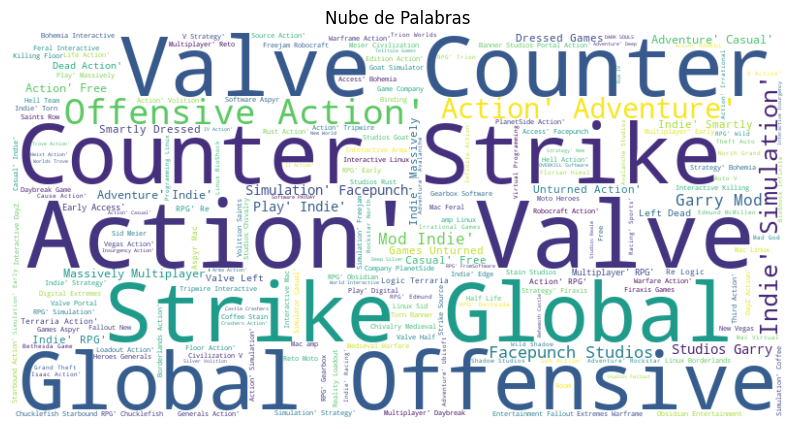

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Supongamos que tienes un DataFrame llamado mergedMachine
# con las columnas de interés en las posiciones 2 a 4
# Reemplaza esto con tus datos reales
data = mergedMachine.iloc[:, 2:5]

# Concatenar el texto de las columnas en una sola cadena
text = ' '.join(data.values.flatten())

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras')
plt.show()

Matriz de correlación

In [123]:
correlation_matrix = mergedMachine.iloc[:, 5:].corr()

print(correlation_matrix)

                         price  recommend     anios  playtimeTotal    Action  \
price                 1.000000  -0.012378 -0.086832       0.052509  0.035524   
recommend            -0.012378   1.000000 -0.103544       0.023727 -0.077822   
anios                -0.086832  -0.103544  1.000000      -0.055849  0.491109   
playtimeTotal         0.052509   0.023727 -0.055849       1.000000  0.009569   
Action                0.035524  -0.077822  0.491109       0.009569  1.000000   
Indie                -0.336846   0.000916  0.031079      -0.140566 -0.406759   
RPG                   0.017541  -0.024084  0.157997      -0.082716  0.146762   
Simulation           -0.115532   0.053381 -0.452883       0.000345 -0.774590   
Adventure            -0.121100  -0.016729  0.412367      -0.139375  0.188857   
Strategy              0.151996   0.013472  0.051697      -0.047694 -0.200314   
Racing                0.063618  -0.003409  0.074821      -0.021627  0.005884   
Casual               -0.352712  -0.01685

Gráfica de Matriz de correlación

In [124]:
import pandas as pd
import plotly.express as px

# Supongamos que tienes un DataFrame llamado mergedMachine con tus datos
# Reemplaza esto con tu DataFrame real
# También asumimos que las columnas 5 en adelante son numéricas
columns_to_include = ['item_id'] + list(mergedMachine.columns[5:])
correlation_matrix = mergedMachine[columns_to_include].corr()
# Crear la gráfica de correlación
fig = px.imshow(correlation_matrix, color_continuous_scale='Darkmint')
fig.update_layout(
    title="Matriz de Correlación",
    width=1200,  # Ancho personalizado
    height=1200  # Alto personalizado
    #template="plotly_dark"  # Fondo oscuro
)

# Mostrar la gráfica
fig.show()

Otras Gráficas

In [125]:
import pandas as pd
import plotly.express as px

# Supongamos que tienes un DataFrame llamado mergedMachine con tus datos
# Reemplaza esto con tu DataFrame real

# Gráfico de barras para la cantidad de juegos por género
genre_counts = mergedMachine.iloc[:, 9:27].sum()
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Género', 'Cantidad de Juegos']

fig = px.bar(
    genre_counts,
    x='Género',
    y='Cantidad de Juegos',
    title='Cantidad de Juegos por Género'
)

fig.update_layout(xaxis_title='Género', yaxis_title='Cantidad de Juegos')
fig.show()



In [126]:
import pandas as pd
import plotly.express as px

# Supongamos que tienes un DataFrame llamado mergedMachine con tus datos
# Reemplaza esto con tu DataFrame real

# Agrupa los datos por user_id y suma el playtimeTotal para cada usuario
total_playtime_by_user = mergedMachine.groupby('user_id')['playtimeTotal'].sum().reset_index()

# Ordena los usuarios por su tiempo total de juego en orden descendente
top_users = total_playtime_by_user.sort_values(by='playtimeTotal', ascending=False).head(5)

# Asigna una paleta de colores predefinida que va de oscuro a claro
color_scale = px.colors.sequential.RdBu_r

# Crea una gráfica de barras con la paleta de colores predefinida
fig = px.bar(
    top_users,
    x='user_id',
    y='playtimeTotal',
    title='Acumulación Total de Tiempo de Juego (Top 5 Usuarios)',
    labels={'user_id': 'Usuario', 'playtimeTotal': 'Tiempo Total de Juego'},
    color='playtimeTotal',  # Usamos el tiempo total como factor de color
    color_continuous_scale=color_scale
)

fig.show()


In [127]:
import pandas as pd
import plotly.express as px

# Supongamos que tienes un DataFrame llamado mergedMachine con tus datos
# Reemplaza esto con tu DataFrame real

fig = px.violin(
    mergedMachine,
    x='anios',
    y='playtimeTotal',
    title='Gráfico de Violín para el Tiempo Total de Juego por Año',
    labels={'anios': 'Año', 'playtimeTotal': 'Tiempo Total de Juego'}
)

fig.show()


### Si es un sistema de recomendación item-item:

def recomendacion_juego( id de producto ): Ingresando el id de producto, deberíamos recibir una lista con 5 juegos recomendados similares al ingresado.

In [128]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def recomendacion_juego(dataframe, id_producto, num_recomendaciones=5):
    # Calcula la similitud del coseno
    features = dataframe.iloc[:, 5:]  # Selecciona las columnas relevantes
    cosine_sim = cosine_similarity(features, features)
    
    # Obtiene el índice del juego ingresado
    idx = dataframe.index[dataframe['item_id'] == id_producto].tolist()[0]
    
    # Obtiene las puntuaciones de similitud del juego ingresado con otros juegos
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Ordena los juegos en función de la similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Inicializa una lista de juegos recomendados
    recommended_games = []
    
    # Itera a través de los juegos recomendados y agrega juegos únicos hasta alcanzar 5 recomendaciones
    for score in sim_scores:
        if len(recommended_games) >= num_recomendaciones:
            break
        recommended_game = dataframe.iloc[score[0]]
        # Verifica si el juego ya está en la lista de recomendaciones y no es el juego de entrada
        if recommended_game['Titulo'] not in recommended_games and recommended_game['item_id'] != id_producto:
            recommended_games.append(recommended_game['Titulo'])
    
    return recommended_games

In [129]:
# Ejemplo de uso
id_producto = 70  # Ingresa el ID del juego que quieras recomendar
recomendaciones = recomendacion_juego(mergedMachine, id_producto)
print("Juegos recomendados para el juego con ID", id_producto, ":")
print(recomendaciones)

Juegos recomendados para el juego con ID 70 :
["Garry's Mod", 'Gunpoint', 'Terraria', 'Half-Life 2', 'Counter-Strike: Global Offensive']


### Si es un sistema de recomendación user-item:

def recomendacion_usuario( id de usuario ): Ingresando el id de un usuario, deberíamos recibir una lista con 5 juegos recomendados para dicho usuario.

In [130]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def recomendacion_usuario_juego(dataframe, user_id, num_recomendaciones=5):
    # Selecciona solo las columnas relevantes para el cálculo de similitud
    features = dataframe.iloc[:, 5:]  # Asumiendo que las columnas de características comienzan en la columna 8
    
    # Calcula la similitud del coseno entre los juegos basados en características
    cosine_sim = cosine_similarity(features, features)
    
    # Obtiene el índice del usuario ingresado
    idx = dataframe.index[dataframe['user_id'] == user_id].tolist()
    
    if not idx:
        return "Usuario no encontrado"
    
    idx = idx[0]
    
    # Obtiene las puntuaciones de similitud del usuario ingresado con otros usuarios
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Ordena los usuarios en función de la similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Obtiene los índices de los juegos recomendados
    top_indices = [x[0] for x in sim_scores]
    
    # Obtiene los nombres de los juegos recomendados junto con sus item_id
    recommended_games = dataframe.iloc[top_indices][['item_id', 'Titulo']].drop_duplicates(subset=['Titulo']).head(num_recomendaciones)
    
    return recommended_games


In [131]:
user_id = 'ducksswamp'  # Reemplaza con el ID de usuario para el que deseas obtener recomendaciones
recomendaciones = recomendacion_usuario_juego(mergedMachine, user_id)
print("Juegos recomendados por el usuario con ID", user_id, ":")
print(recomendaciones)

Juegos recomendados por el usuario con ID ducksswamp :
       item_id                            Titulo
92        4000                       Garry's Mod
4015       730  Counter-Strike: Global Offensive
8532    230410                          Warframe
11481       10                    Counter-Strike
8325    107410                            Arma 3


Al final para que se pudiera mostrar todo el deploy se realizo modificaciones significativas en los datos, se genero un archivo csv más pequeño para que sea capaz de leer los datos y no supere el procesamiento de memoria de las 512MB que permite render, el archivo de prueba para las funciones de machine learning es mergedMachineM.csv

In [132]:
mergedMachineMod = mergedMachine.groupby('item_id').head(60)
mergedMachineMod.reset_index(drop=True, inplace=True)

In [133]:
mergedMachineMod.to_csv('mergedMachineM.csv', index=False)

### F6 Y F7 RENDER

In [134]:
mergedMachineMod.head()

,item_id,user_id,Titulo,genres,developer,price,recommend,anios,playtimeTotal,Action,...,MassivelyMultiplayer,Sports,EarlyAccess,Animation,Modeling,Education,Utilities,WebPublishing,VideoProduction,Desconocido
0,70,mrpfresh,Half-Life,'Action',Valve,9.99,1,1998,590,1,...,0,0,0,0,0,0,0,0,0,0
1,70,digfernandes,Half-Life,'Action',Valve,9.99,1,1998,463,1,...,0,0,0,0,0,0,0,0,0,0
2,70,digfernandes,Half-Life,'Action',Valve,9.99,1,1998,27,1,...,0,0,0,0,0,0,0,0,0,0
3,70,phrostb,Half-Life,'Action',Valve,9.99,1,1998,233,1,...,0,0,0,0,0,0,0,0,0,0
4,70,KewlKatzz,Half-Life,'Action',Valve,9.99,1,1998,673,1,...,0,0,0,0,0,0,0,0,0,0


In [135]:
mergedMachineMod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               4217 non-null   int64  
 1   user_id               4217 non-null   object 
 2   Titulo                4217 non-null   object 
 3   genres                4217 non-null   object 
 4   developer             4217 non-null   object 
 5   price                 4217 non-null   float64
 6   recommend             4217 non-null   int64  
 7   anios                 4217 non-null   int64  
 8   playtimeTotal         4217 non-null   int64  
 9   Action                4217 non-null   int64  
 10  Indie                 4217 non-null   int64  
 11  RPG                   4217 non-null   int64  
 12  Simulation            4217 non-null   int64  
 13  Adventure             4217 non-null   int64  
 14  Strategy              4217 non-null   int64  
 15  Racing               